In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv(r"D:\InterSkill_solution\Model Project\House price prediction\Bengaluru_House_Data.csv")

In [3]:
data.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


In [4]:
data.shape

(13320, 9)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13320 entries, 0 to 13319
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   area_type     13320 non-null  object 
 1   availability  13320 non-null  object 
 2   location      13319 non-null  object 
 3   size          13304 non-null  object 
 4   society       7818 non-null   object 
 5   total_sqft    13320 non-null  object 
 6   bath          13247 non-null  float64
 7   balcony       12711 non-null  float64
 8   price         13320 non-null  float64
dtypes: float64(3), object(6)
memory usage: 936.7+ KB


In [6]:
# Checking value counts

for col in data:
    print(data[col].value_counts())

area_type
Super built-up  Area    8790
Built-up  Area          2418
Plot  Area              2025
Carpet  Area              87
Name: count, dtype: int64
availability
Ready To Move    10581
18-Dec             307
18-May             295
18-Apr             271
18-Aug             200
                 ...  
16-Oct               1
17-Jan               1
16-Nov               1
16-Jan               1
14-Jul               1
Name: count, Length: 81, dtype: int64
location
Whitefield                         540
Sarjapur  Road                     399
Electronic City                    302
Kanakpura Road                     273
Thanisandra                        234
                                  ... 
3rd Stage Raja Rajeshwari Nagar      1
Chuchangatta Colony                  1
Electronic City Phase 1,             1
Chikbasavanapura                     1
Abshot Layout                        1
Name: count, Length: 1305, dtype: int64
size
2 BHK         5199
3 BHK         4310
4 Bedroom      826
4 BH

In [7]:
data.isnull().sum()

area_type          0
availability       0
location           1
size              16
society         5502
total_sqft         0
bath              73
balcony          609
price              0
dtype: int64

In [8]:
# # columns that have null values : 
# location           1
# size              16
# society           5502
# bath              73
# balcony          609

In [ ]:
# Why we dropped these columns:

# area_type → Very low impact on price and adds unnecessary categories.

# availability → Irrelevant for price prediction and contains inconsistent values.

# society → Too many unique values, many missing values, and does not strongly affect price.

# balcony → Very weak feature with almost no influence on price.

# These columns do not help in prediction and add noise, so dropping them improves model accuracy and simplicity.

In [10]:
# Removing columns that are not going to help in prediction
data.drop(columns = ['area_type','availability','society','balcony'],inplace=True)

In [11]:
data

,location,size,total_sqft,bath,price
0,Electronic City Phase II,2 BHK,1056,2.0,39.07
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00
2,Uttarahalli,3 BHK,1440,2.0,62.00
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00
4,Kothanur,2 BHK,1200,2.0,51.00
...,...,...,...,...,...
13315,Whitefield,5 Bedroom,3453,4.0,231.00
13316,Richards Town,4 BHK,3600,5.0,400.00
13317,Raja Rajeshwari Nagar,2 BHK,1141,2.0,60.00
13318,Padmanabhanagar,4 BHK,4689,4.0,488.00


In [12]:
data.describe()

,bath,price
count,13247.000000,13320.000000
mean,2.692610,112.565627
std,1.341458,148.971674
min,1.000000,8.000000
25%,2.000000,50.000000
50%,2.000000,72.000000
75%,3.000000,120.000000
max,40.000000,3600.000000


# Handling missing value

In [13]:
data.isnull().sum()

location       1
size          16
total_sqft     0
bath          73
price          0
dtype: int64

In [14]:
# location have only 1 null value lets's fill it 

data['location'].value_counts()

location
Whitefield                         540
Sarjapur  Road                     399
Electronic City                    302
Kanakpura Road                     273
Thanisandra                        234
                                  ... 
3rd Stage Raja Rajeshwari Nagar      1
Chuchangatta Colony                  1
Electronic City Phase 1,             1
Chikbasavanapura                     1
Abshot Layout                        1
Name: count, Length: 1305, dtype: int64

In [15]:
# Whitefield -- 540
# so let's fill location null values with whitefield

data['location'] = data['location'].fillna('Whitefield')

In [16]:
data['size'].value_counts()

size
2 BHK         5199
3 BHK         4310
4 Bedroom      826
4 BHK          591
3 Bedroom      547
1 BHK          538
2 Bedroom      329
5 Bedroom      297
6 Bedroom      191
1 Bedroom      105
8 Bedroom       84
7 Bedroom       83
5 BHK           59
9 Bedroom       46
6 BHK           30
7 BHK           17
1 RK            13
10 Bedroom      12
9 BHK            8
8 BHK            5
11 BHK           2
10 BHK           2
11 Bedroom       2
27 BHK           1
19 BHK           1
43 Bedroom       1
16 BHK           1
14 BHK           1
12 Bedroom       1
13 BHK           1
18 Bedroom       1
Name: count, dtype: int64

In [17]:
# size have 16 null values
# as 2 BHK  --   5199  comes frequently we will replace with this

data['size']=data['size'].fillna('2 BHK')

In [18]:
# bath have 73 null values and it is numerical columns we will replace it with the median

data['bath']=data['bath'].fillna(data['bath'].median())

In [19]:
data.isnull().sum()

location      0
size          0
total_sqft    0
bath          0
price         0
dtype: int64

In [20]:
# if u will see in size column we have data like this
# size
# 2 BHK         5199
# 3 BHK         4310
# 4 Bedroom      826
# 4 BHK          591
# 3 Bedroom      547
# 1 BHK          538
# 2 Bedroom      329
# 5 Bedroom      297

# let's remove BHK and Bedroom and keep only number and save it in new column bhk.

data['bhk']=data['size'].str.split().str.get(0).astype(int)

In [21]:
data.describe()

,bath,price,bhk
count,13320.000000,13320.000000,13320.000000
mean,2.688814,112.565627,2.802778
std,1.338754,148.971674,1.294496
min,1.000000,8.000000,1.000000
25%,2.000000,50.000000,2.000000
50%,2.000000,72.000000,3.000000
75%,3.000000,120.000000,3.000000
max,40.000000,3600.000000,43.000000


In [22]:
# here if u will notice we have min 1 bhk and max 43 bhk room let's see how many room we have more than 20 bhk

data[data['bhk']>20]

,location,size,total_sqft,bath,price,bhk
1718,2Electronic City Phase II,27 BHK,8000,27.0,230.0,27
4684,Munnekollal,43 Bedroom,2400,40.0,660.0,43


{'whiskers': [<matplotlib.lines.Line2D at 0x139ba34d310>,
 'caps': [<matplotlib.lines.Line2D at 0x139ba34d590>,
 'boxes': [<matplotlib.lines.Line2D at 0x139ba261310>],
 'medians': [<matplotlib.lines.Line2D at 0x139ba34d810>],
 'fliers': [<matplotlib.lines.Line2D at 0x139ba34d950>],
 'means': []}

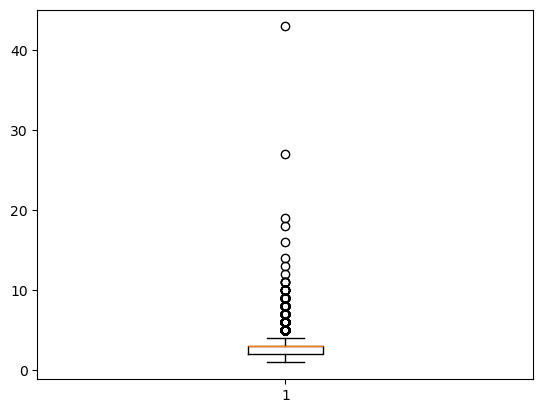

In [23]:
plt.boxplot(data['bhk'])

In [24]:
data['total_sqft'].unique()

array(['1056', '2600', '1440', ..., '1133 - 1384', '774', '4689'],
      dtype=object)

In [25]:
# above you can see some values are in range so we will do below step

# step 1 : split through hypen (-)
# step 2 : now we will calculate mean
                     # (add/2) both the integer value (1133+1384)/2

def covertRange(x):
    temp = x.split('-')
    if len(temp) == 2:
        return (float(temp[0]) + float(temp[1]))/2
    try:
        return float(x)
    except:
        return None

print("let's try one example:-")
print(covertRange('1133 - 1384'))

let's try one example:-
1258.5


In [26]:
# now let's use this function on 'total_sqft' column 
data['total_sqft']=data['total_sqft'].apply(covertRange)

In [27]:
data['total_sqft'].unique()

array([1056. , 2600. , 1440. , ..., 1258.5,  774. , 4689. ])

In [28]:
# now no value in data['total_sqft'] are in range
data.head()

,location,size,total_sqft,bath,price,bhk
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3
4,Kothanur,2 BHK,1200.0,2.0,51.00,2


Feature Engineering :
Price per Square feet

In [29]:
# price is in lakh 39 lakh 
# so first covert it into lakh like this 3900000
# then use formula [price/sqft]

data['price_per_sqft'] = (data['price']*100000)/data['total_sqft']

In [30]:
data['price_per_sqft']

0         3699.810606
1         4615.384615
2         4305.555556
3         6245.890861
4         4250.000000
             ...     
13315     6689.834926
13316    11111.111111
13317     5258.545136
13318    10407.336319
13319     3090.909091
Name: price_per_sqft, Length: 13320, dtype: float64

In [31]:
data.describe()

,total_sqft,bath,price,bhk,price_per_sqft
count,13274.000000,13320.000000,13320.000000,13320.000000,1.327400e+04
mean,1559.626694,2.688814,112.565627,2.802778,7.907501e+03
std,1238.405258,1.338754,148.971674,1.294496,1.064296e+05
min,1.000000,1.000000,8.000000,1.000000,2.678298e+02
25%,1100.000000,2.000000,50.000000,2.000000,4.266865e+03
50%,1276.000000,2.000000,72.000000,3.000000,5.434306e+03
75%,1680.000000,3.000000,120.000000,3.000000,7.311746e+03
max,52272.000000,40.000000,3600.000000,43.000000,1.200000e+07


In [32]:
# we can clearly see that mean or average price_per_sqft is 7.907501e+03 i.e. 7907 approx 7000  --- +03 means 1000

In [33]:
data['location'].value_counts()

location
Whitefield                         541
Sarjapur  Road                     399
Electronic City                    302
Kanakpura Road                     273
Thanisandra                        234
                                  ... 
3rd Stage Raja Rajeshwari Nagar      1
Chuchangatta Colony                  1
Electronic City Phase 1,             1
Chikbasavanapura                     1
Abshot Layout                        1
Name: count, Length: 1305, dtype: int64

In [34]:
# loacation have 'Length: 1305' 1305 different categories and doing encoding on this much different categories is not worth it 
# so we will replace the location with 'others' that comes less than 10 times in column

# first remove extra spaces using strip
# now apply counts()

# we are removing first space then counting becuase 
# machine is counting ['Whitespace' ,'  whitespace','whitespace  '] as 3 different beacuse of 
# some leading and trailing space therefore first remove spaces then count the value

In [35]:
data['location'] = data['location'].str.strip() 

In [36]:
location_count = data['location'].value_counts()
location_count

location
Whitefield                              542
Sarjapur  Road                          399
Electronic City                         304
Kanakpura Road                          273
Thanisandra                             237
                                       ... 
Duddanahalli                              1
Doddanakunte                              1
Jogupalya                                 1
Subhash Nagar                             1
Kengeri Satellite Town KHB Apartment      1
Name: count, Length: 1294, dtype: int64

In [37]:
# now location have 'Length: 1294' this much different catrgory 
# so we will replace the location with 'others' that comes less than 10 times in column

location_count_less_10 = location_count[location_count <= 10]
location_count_less_10

location
Basapura                                10
Dairy Circle                            10
Nagappa Reddy Layout                    10
Naganathapura                           10
Sector 1 HSR Layout                     10
                                        ..
Duddanahalli                             1
Doddanakunte                             1
Jogupalya                                1
Subhash Nagar                            1
Kengeri Satellite Town KHB Apartment     1
Name: count, Length: 1053, dtype: int64

In [38]:
# less than 10 are Length: 1053
# change with others

data['location'] = data['location'].apply(lambda x : 'other' if x in location_count_less_10 else x)

In [39]:
data['location'].value_counts()

location
other                        2885
Whitefield                    542
Sarjapur  Road                399
Electronic City               304
Kanakpura Road                273
                             ... 
Tindlu                         11
Marsur                         11
2nd Phase Judicial Layout      11
Thyagaraja Nagar               11
HAL 2nd Stage                  11
Name: count, Length: 242, dtype: int64

In [40]:
# now we have only 'Length: 242' different location

# Outliers detection and removal

In [41]:
data.describe()

,total_sqft,bath,price,bhk,price_per_sqft
count,13274.000000,13320.000000,13320.000000,13320.000000,1.327400e+04
mean,1559.626694,2.688814,112.565627,2.802778,7.907501e+03
std,1238.405258,1.338754,148.971674,1.294496,1.064296e+05
min,1.000000,1.000000,8.000000,1.000000,2.678298e+02
25%,1100.000000,2.000000,50.000000,2.000000,4.266865e+03
50%,1276.000000,2.000000,72.000000,3.000000,5.434306e+03
75%,1680.000000,3.000000,120.000000,3.000000,7.311746e+03
max,52272.000000,40.000000,3600.000000,43.000000,1.200000e+07


In [42]:
# if you will notice in 'total_sqft' we have min -- 1.000000 sqft but there is no house that have only 1 sqft
# it can be included in outliers

In [43]:
# we will find total_sqft per bhk 

(data['total_sqft']/data['bhk']).describe()

count    13274.000000
mean       575.074878
std        388.205175
min          0.250000
25%        473.333333
50%        552.500000
75%        625.000000
max      26136.000000
dtype: float64

In [44]:
# min -- 0.250000 there is a bhk flat which is 0.25 bhk which is an ouliers -- because 0.25 flat is not feasible

# remove those that have sqft/bhk is less than 300
data = data[((data['total_sqft']/data['bhk'])>=300)]
data.describe()

,total_sqft,bath,price,bhk,price_per_sqft
count,12530.000000,12530.000000,12530.000000,12530.000000,12530.000000
mean,1594.564544,2.559537,111.382401,2.650838,6303.979357
std,1261.271296,1.077938,152.077329,0.976678,4162.237981
min,300.000000,1.000000,8.440000,1.000000,267.829813
25%,1116.000000,2.000000,49.000000,2.000000,4210.526316
50%,1300.000000,2.000000,70.000000,3.000000,5294.117647
75%,1700.000000,3.000000,115.000000,3.000000,6916.666667
max,52272.000000,16.000000,3600.000000,16.000000,176470.588235


In [45]:
# now our min total_sqft becomes -- 300 'min	300.000000'
data.shape

(12530, 7)

# Removing outliers from price_per_sqft

In [46]:
data.price_per_sqft.describe()

count     12530.000000
mean       6303.979357
std        4162.237981
min         267.829813
25%        4210.526316
50%        5294.117647
75%        6916.666667
max      176470.588235
Name: price_per_sqft, dtype: float64

In [47]:
# Removing outliers from price_per_sqft

def remove_pps_outliers(df):
    df_out = pd.DataFrame()
    for key, subdf in df.groupby('location'):
        m = np.mean(subdf.price_per_sqft)
        st = np.std(subdf.price_per_sqft)
        gen_df = subdf[(subdf.price_per_sqft>(m-st)) & (subdf.price_per_sqft<=(m+st))]
        df_out = pd.concat([df_out,gen_df],ignore_index=True)
    return df_out
data = remove_pps_outliers(data)


print(data.shape)
print(data.describe())

(10301, 7)
         total_sqft          bath         price           bhk  price_per_sqft
count  10301.000000  10301.000000  10301.000000  10301.000000    10301.000000
mean    1508.440608      2.471702     91.286372      2.574896     5659.062876
std      880.694214      0.979449     86.342786      0.897649     2265.774749
min      300.000000      1.000000     10.000000      1.000000     1250.000000
25%     1110.000000      2.000000     49.000000      2.000000     4244.897959
50%     1286.000000      2.000000     67.000000      2.000000     5175.600739
75%     1650.000000      3.000000    100.000000      3.000000     6428.571429
max    30400.000000     16.000000   2200.000000     16.000000    24509.803922


In [48]:
data.price_per_sqft.describe()

count    10301.000000
mean      5659.062876
std       2265.774749
min       1250.000000
25%       4244.897959
50%       5175.600739
75%       6428.571429
max      24509.803922
Name: price_per_sqft, dtype: float64

In [49]:
# now our price_per_sqft mean and std reduce

# Removing outliers from bhk

In [50]:
def remove_bhk_outliers(df):
    exclude_indices = np.array([])
    for location, location_df in df.groupby('location'):
        bhk_stats = {}
        for bhk, bhk_df in location_df.groupby('bhk'):
            bhk_stats[bhk] = {
                'mean': np.mean(bhk_df.price_per_sqft),
                'std': np.std(bhk_df.price_per_sqft),
                'count': bhk_df.shape[0]
            }
            
        # print(location,bhk_stats)
        
        for bhk, bhk_df in location_df.groupby('bhk'):
            stats = bhk_stats.get(bhk-1)
            if stats and stats['count']>5:
                exclude_indices = np.append(exclude_indices, bhk_df[bhk_df.price_per_sqft<(stats['mean'])].index.values)
                
    return df.drop(exclude_indices,axis='index')

In [51]:
data = remove_bhk_outliers(data)  
# below is showing the statistical measure for each location with along with bhk number
#  for example :

# 1st Block Jayanagar {2: {'mean': np.float64(11983.805668016194), 'std': 0.0, 'count': 1},
#                      3: {'mean': np.float64(11756.16905248807), 'std': 701.6243657657865, 'count': 3},
#                      4: {'mean': np.float64(15018.711280365416), 'std': 1.2278182423353805, 'count': 3}}

# above shows in jayanager what is the mean ,std of 2bhk,3bhk, and 4bhk .

In [52]:
data.shape

(7361, 7)

In [53]:
data

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,1st Block Jayanagar,4 BHK,2850.0,4.0,428.0,4,15017.543860
1,1st Block Jayanagar,3 BHK,1630.0,3.0,194.0,3,11901.840491
2,1st Block Jayanagar,3 BHK,1875.0,2.0,235.0,3,12533.333333
3,1st Block Jayanagar,3 BHK,1200.0,2.0,130.0,3,10833.333333
4,1st Block Jayanagar,2 BHK,1235.0,2.0,148.0,2,11983.805668
...,...,...,...,...,...,...,...
10292,other,2 BHK,1200.0,2.0,70.0,2,5833.333333
10293,other,1 BHK,1800.0,1.0,200.0,1,11111.111111
10296,other,2 BHK,1353.0,2.0,110.0,2,8130.081301
10297,other,1 Bedroom,812.0,1.0,26.0,1,3201.970443


In [54]:
# now let;s remove size column and 
# price_per_sqft -- which only helps to remove the outliers.
data.drop(columns=['size','price_per_sqft'],inplace=True)

# Cleaned data

In [55]:
data.head()

,location,total_sqft,bath,price,bhk
0,1st Block Jayanagar,2850.0,4.0,428.0,4
1,1st Block Jayanagar,1630.0,3.0,194.0,3
2,1st Block Jayanagar,1875.0,2.0,235.0,3
3,1st Block Jayanagar,1200.0,2.0,130.0,3
4,1st Block Jayanagar,1235.0,2.0,148.0,2


In [56]:
data.to_csv("Cleaned_house_data.csv")

In [57]:
x = data.drop(columns = ['price'])
y = data['price']

In [58]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression,Lasso,Ridge
from sklearn.preprocessing import OneHotEncoder,StandardScaler
from sklearn.compose import make_column_transformer
from sklearn.pipeline import make_pipeline
from sklearn.metrics import r2_score

In [59]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)

In [60]:
print(x_train.shape)
print(x_test.shape)

(5888, 4)
(1473, 4)


# Applying linear regression

In [61]:
column_trans=make_column_transformer((OneHotEncoder(sparse_output=False),['location']),
                                    remainder='passthrough')

In [62]:
scaler = StandardScaler()

In [63]:
lr=LinearRegression()

In [64]:
pipe=make_pipeline(column_trans,scaler,lr)

In [65]:
pipe.fit(x_train,y_train)

c:\ProgramData\anaconda3\Lib\site-packages\sklearn\compose\_column_transformer.py:1667: FutureWarning: 
The format of the columns of the 'remainder' transformer in ColumnTransformer.transformers_ will change in version 1.7 to match the format of the other transformers.
At the moment the remainder columns are stored as indices (of type int). With the same ColumnTransformer configuration, in the future they will be stored as column names (of type str).
To use the new behavior now and suppress this warning, use ColumnTransformer(force_int_remainder_cols=False).

  warnings.warn(


Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(sparse_output=False),
                                                  ['location'])])),
                ('standardscaler', StandardScaler()),
                ('linearregression', LinearRegression())])

In [66]:
y_pred=pipe.predict(x_test)

In [67]:
r2_score(y_test,y_pred)

0.8251977016381458

# Applying Lasso

In [68]:
lasso = Lasso()

In [69]:
pipe=make_pipeline(column_trans,scaler,lasso)

In [70]:
pipe.fit(x_train,y_train)

c:\ProgramData\anaconda3\Lib\site-packages\sklearn\compose\_column_transformer.py:1667: FutureWarning: 
The format of the columns of the 'remainder' transformer in ColumnTransformer.transformers_ will change in version 1.7 to match the format of the other transformers.
At the moment the remainder columns are stored as indices (of type int). With the same ColumnTransformer configuration, in the future they will be stored as column names (of type str).
To use the new behavior now and suppress this warning, use ColumnTransformer(force_int_remainder_cols=False).

  warnings.warn(


Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(sparse_output=False),
                                                  ['location'])])),
                ('standardscaler', StandardScaler()), ('lasso', Lasso())])

In [71]:
y_pred_lasso =pipe.predict(x_test)
r2_score(y_test,y_pred_lasso)

0.8146894751690389

# Applying Ridge

In [72]:
ridge = Ridge()

In [73]:
pipe=make_pipeline(column_trans,scaler,ridge)

In [74]:
pipe.fit(x_train,y_train)

c:\ProgramData\anaconda3\Lib\site-packages\sklearn\compose\_column_transformer.py:1667: FutureWarning: 
The format of the columns of the 'remainder' transformer in ColumnTransformer.transformers_ will change in version 1.7 to match the format of the other transformers.
At the moment the remainder columns are stored as indices (of type int). With the same ColumnTransformer configuration, in the future they will be stored as column names (of type str).
To use the new behavior now and suppress this warning, use ColumnTransformer(force_int_remainder_cols=False).

  warnings.warn(


Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(sparse_output=False),
                                                  ['location'])])),
                ('standardscaler', StandardScaler()), ('ridge', Ridge())])

In [75]:
y_pred_ridge =pipe.predict(x_test)
r2_score(y_test,y_pred_ridge)

0.8252348502290165

In [76]:
print("No Regularization: ",r2_score(y_test,y_pred))
print("Lasso: ",r2_score(y_test,y_pred_lasso))
print("Ridge: ",r2_score(y_test,y_pred_ridge))

No Regularization:  0.8251977016381458
Lasso:  0.8146894751690389
Ridge:  0.8252348502290165


In [77]:
import pickle

In [78]:
pickle.dump(pipe,open('RidgeModel.pkl','wb'))